In [1]:
import models
import os
import pandas as pd
from models import get_raw_data, get_rpm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pasta ='database/dados_brutos/normal'

# pasta ='database/dados_brutos/horizontal-misalignment/0.5mm'
# pasta ='database/dados_brutos/horizontal-misalignment/1.0mm'
# pasta ='database/dados_brutos/horizontal-misalignment/1.5mm'
# pasta ='database/dados_brutos/horizontal-misalignment/2.0mm'

# pasta ='database/dados_brutos/imbalance/6g'
# pasta ='database/dados_brutos/imbalance/10g'
# pasta ='database/dados_brutos/imbalance/15g'
# pasta ='database/dados_brutos/imbalance/20g'
# pasta ='database/dados_brutos/imbalance/25g'
# pasta ='database/dados_brutos/imbalance/30g'
# pasta ='database/dados_brutos/imbalance/35g'

pasta ='database/dados_brutos/overhang/ball_fault/0g'
# pasta ='database/dados_brutos/overhang/ball_fault/6g'
# pasta ='database/dados_brutos/overhang/ball_fault/20g'
# pasta ='database/dados_brutos/overhang/ball_fault/35g'

# pasta ='database/dados_brutos/overhang/cage_fault/0g'
# pasta ='database/dados_brutos/overhang/cage_fault/6g'
# pasta ='database/dados_brutos/overhang/cage_fault/20g'
# pasta ='database/dados_brutos/overhang/cage_fault/35g'

# pasta ='database/dados_brutos/overhang/outer_race/0g'
# pasta ='database/dados_brutos/overhang/outer_race/6g'
# pasta ='database/dados_brutos/overhang/outer_race/20g'
# pasta ='database/dados_brutos/overhang/outer_race/35g'
 
# pasta ='database/dados_brutos/underhang/ball_fault/0g'
# pasta ='database/dados_brutos/underhang/ball_fault/6g'
# pasta ='database/dados_brutos/underhang/ball_fault/20g'
# pasta ='database/dados_brutos/underhang/ball_fault/35g'

# pasta ='database/dados_brutos/underhang/cage_fault/0g'
# pasta ='database/dados_brutos/underhang/cage_fault/6g'
# pasta ='database/dados_brutos/underhang/cage_fault/20g'
# pasta ='database/dados_brutos/underhang/cage_fault/35g'

# pasta ='database/dados_brutos/underhang/outer_race/0g'
# pasta ='database/dados_brutos/underhang/outer_race/6g'
# pasta ='database/dados_brutos/underhang/outer_race/20g'
# pasta ='database/dados_brutos/underhang/outer_race/35g'

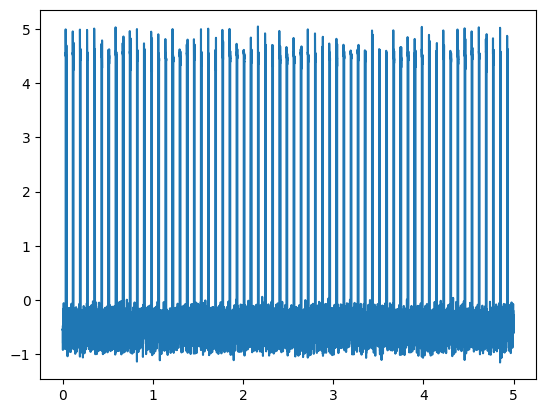

12.600000000000001


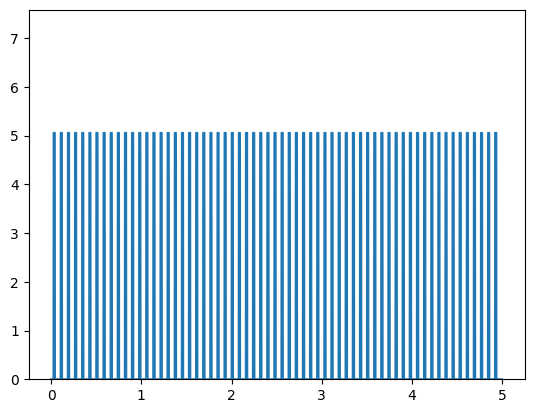

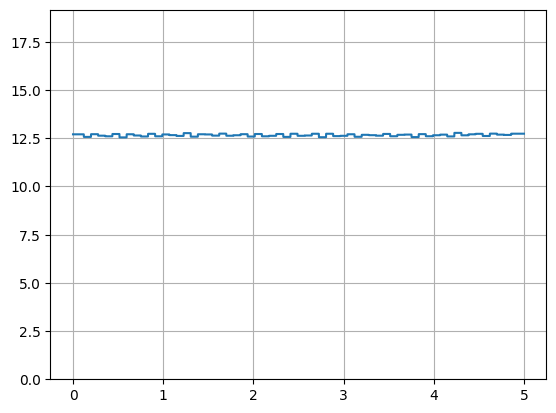

12.600000000000001


In [3]:
arquivos = os.listdir(pasta)
rpms = []
tamanho = 150000
arquivo = arquivos[0]

sinal = get_raw_data.GetData(pasta,arquivo,0)

sinal = sinal.Get()
# sinal = pd.json_normalize(sinal)


frequencia_aquisicao = models.freq_aquisicao
n_points = len(sinal)

t_total = n_points/frequencia_aquisicao

vetor_tempo = np.linspace(0,t_total,n_points)

plt.plot(vetor_tempo,sinal)
# plt.axis('off')
plt.show()

rpm = get_rpm.GetRPM(pasta,arquivo)
rpm_ponto = rpm.get_rpm_ponto_a_ponto('hz')
rpm_medio = rpm.get_rpm_medio('hz')
print(rpm_medio)
rpm.plot_picos()
rpm.plot_rpm('hz')

print(rpm_medio)


12.600000000000001
13.8
15.4
16.2
17.2
18.2
19.200000000000003
20.200000000000003
21.0
21.8
23.0
23.8
25.200000000000003
25.8
26.8
28.200000000000003
28.6
29.400000000000002
30.8
32.0
32.800000000000004
33.6
34.800000000000004
35.6
36.6
37.4
38.6
39.400000000000006
40.400000000000006
41.400000000000006
42.400000000000006
43.0
44.2
45.400000000000006
46.400000000000006
47.400000000000006
48.400000000000006
49.800000000000004
50.6
51.2
51.800000000000004
53.400000000000006
54.400000000000006
55.0
56.800000000000004
57.400000000000006
58.400000000000006
59.0
60.0


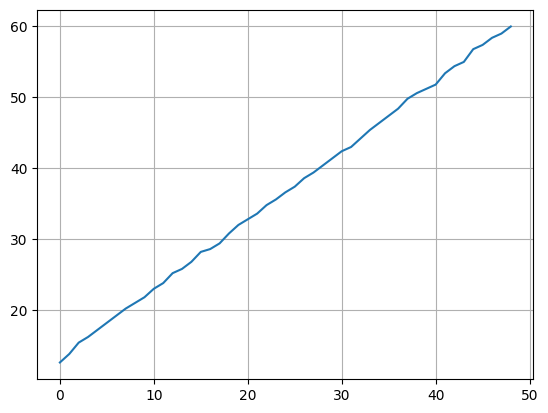

RPM minimo = 12.600000000000001
RPM máximo = 60.0


In [4]:
arquivos = os.listdir(pasta)

sinal_rpm = get_raw_data.GetData(pasta,arquivos[0],0)
sinal_rpm = sinal_rpm.Get()
rpm = get_rpm.GetRPM(pasta,arquivo)
rpm_medio = rpm.get_rpm_medio('hz')

rpms = [rpm_medio]
frequencia_aquisicao = models.freq_aquisicao

for i in range(len(arquivos)):
    sinal_rpm = get_raw_data.GetData(pasta,arquivos[i],0)
    sinal_rpm = sinal_rpm.Get()
    # sinal_rpm = pd.json_normalize(sinal_rpm)


    n_points = len(sinal_rpm)

    t_total = n_points/frequencia_aquisicao

    vetor_tempo = np.linspace(0,t_total,n_points)

    rpm = get_rpm.GetRPM(pasta,arquivos[i])
    rpm_medio = rpm.get_rpm_medio('hz')
    

    if np.abs(rpm_medio) > np.abs(rpms[-1])+3:
        rpm_medio = rpms[-1]+1

    rpms.append(rpm_medio)
    print(rpm_medio)

rpms.pop(0)

plt.plot(range(len(rpms)),rpms)
plt.grid(True)
plt.show()

print(f'RPM minimo = {np.min(rpms)}')
print(f'RPM máximo = {np.max(rpms)}')


In [5]:
len(rpms)

49

In [6]:
import models
from models import get_raw_data, extrair_indicadores,listar_rpms
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import time

start = time.time()

rpms = listar_rpms.ListaRPM(pasta).Get()
print(rpms)

end = time.time()

elapsed_time = end - start

elapsed_minutes = elapsed_time / 60

print("Tempo de execução: {:.2f} minutos".format(elapsed_minutes))

[12.600000000000001, 13.8, 15.4, 16.2, 17.2, 18.2, 19.200000000000003, 20.200000000000003, 21.0, 21.8, 23.0, 23.8, 25.200000000000003, 25.8, 26.8, 28.200000000000003, 28.6, 29.400000000000002, 30.8, 32.0, 32.800000000000004, 33.6, 34.800000000000004, 35.6, 36.6, 37.4, 38.6, 39.400000000000006, 40.400000000000006, 41.400000000000006, 42.400000000000006, 43.0, 44.2, 45.400000000000006, 46.400000000000006, 47.400000000000006, 48.400000000000006, 49.800000000000004, 50.6, 51.2, 51.800000000000004, 53.400000000000006, 54.400000000000006, 55.0, 56.800000000000004, 57.400000000000006, 58.400000000000006, 59.0, 60.0]
Tempo de execução: 0.91 minutos
